In [29]:
#--------------------------------------------------------------------------------
#Импорт системных библиотек
import warnings
warnings.simplefilter("ignore")

#Импорт необходимых библиотек
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time #для остановок при запуске парсера

#Функция для выдачи всех метрик
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score, explained_variance_score
def regress_score(y_true, y_pred, Print = 'Yes'):
    # Calculate regression metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mdape = np.median((np.abs(np.subtract(y_true, y_pred)/ y_true))) * 100
    if Print == 'Yes':
        print('MDAPE: ', mdape)
        print('Mean Absolute Error (MAE):', mae)
        print('Mean Squared Error (MSE):', mse)
        print('Median_absolute_error: ', medae)
        print('R2: ', r2)
        print('Explained_variance_score: ', evs)
    
    return mdape, r2

#Функция расчета расстояния между координатами
import math
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance in meters between two points given their latitude and longitude coordinates.
    """
    # Radius of the Earth in meters
    earth_radius = 6371000

    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(delta_lat/2) * math.sin(delta_lat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2) * math.sin(delta_lon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Calculate the distance
    distance = earth_radius * c

    return distance


#--------------------------------------------------------------------------------

In [2]:
PATH = r"C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\MVP CIAN\data\\"
df_file_name = PATH + 'Df2023_05_23_21_32_31.xlsx'

#Загрузка файлов из Excel
#Дропаем объявеления с ценниками покупки бизнеса
#Перекодировка переменной района
from sklearn.preprocessing import OneHotEncoder 
data = pd.read_excel(df_file_name) 
data = data[data['Ready Business?']!='"rentalBusiness"']
data = data[data['Ready Business?']!='"readyBusiness"']
data = data[(data['Full Price']<0)|(data['Full Price']>0)]
data['Price Per Square Meter'] = data['Full Price']/data['Total Area']
data.loc[data['Full Price'] < 1000000, 'Price Per Square Meter'] = data['Full Price']


ohe = OneHotEncoder(sparse=False) 
new_ohe_features = ohe.fit_transform(data['District'].values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=list(data['District'].value_counts().index))
data= pd.concat([data, tmp], axis=1)
#После перекодировки в датасете появляется очень много NaN
data = data[(data['Full Price']<0)|(data['Full Price']>0)]




In [3]:
Tverskoy_District_lat = 55.7642
Tverskoy_District_lon = 37.6052
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Tverskoy District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                               row['Lng'], 
                                                                               Tverskoy_District_lat, 
                                                                               Tverskoy_District_lon), axis=1)

Arbat_District_lat = 55.7492
Arbat_District_lon = 37.5886
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Arbat District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                            row['Lng'], 
                                                                            Arbat_District_lat , 
                                                                            Arbat_District_lon), axis=1)

Presnensky_Districtt_lat = 55.7525
Presnensky_Districtt_lon = 37.5394
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Presnensky District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                 row['Lng'], 
                                                                                 Presnensky_Districtt_lat, 
                                                                                 Presnensky_Districtt_lon), axis=1)
 
Khamovniki_District_lat = 55.7339
Khamovniki_District_lon = 37.5631
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Khamovniki District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                 row['Lng'], 
                                                                                 Khamovniki_District_lat, 
                                                                                 Khamovniki_District_lon), axis=1)
 
Basmanny_District_lat = 55.7656
Basmanny_District_lon = 37.6634
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Basmanny District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                               row['Lng'], 
                                                                               Basmanny_District_lat, 
                                                                               Basmanny_District_lon), axis=1)
 
Zamoskvorechye_District_lat = 55.7263
Zamoskvorechye_District_lon = 37.6432
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Zamoskvorechye District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                     row['Lng'], 
                                                                                     Zamoskvorechye_District_lat, 
                                                                                     Zamoskvorechye_District_lon), axis=1)
 
Yakimanka_District_lat = 55.7355
Yakimanka_District_lon = 37.6269
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Yakimanka District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                row['Lng'], 
                                                                                Yakimanka_District_lat, 
                                                                                Yakimanka_District_lon), axis=1)
 
Meshchansky_District_lat = 55.7733
Meshchansky_District_lon = 37.6331
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Meshchansky District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                  row['Lng'], 
                                                                                  Meshchansky_District_lat, 
                                                                                  Meshchansky_District_lon), axis=1)

red_square_lat = 55.7538337
red_square_lon = 37.6211812
# Apply the calculate_distance function to replace 'Lat' and 'Lnf' columns with distance to Red Square
data['Distance Red Square'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                        row['Lng'], 
                                                                        red_square_lat, 
                                                                        red_square_lon), axis=1)

nizhegorodsky_district_lat = 55.7383
nizhegorodsky_district_lon = 37.7228

# Apply the calculate_distance function to replace 'Lat' and 'Lng' columns with distance to Red Square
data['Distance Nizhegorodsky District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                    row['Lng'], 
                                                                                    nizhegorodsky_district_lat, 
                                                                                    nizhegorodsky_district_lon), axis=1)

# Latitude and longitude of Yuzhnoportovy District
yuzhnoportovy_district_lat = 55.7333
yuzhnoportovy_district_lon = 37.6672

# Apply the calculate_distance function to replace 'Lat' and 'Lng' columns with distance to Red Square
data['Distance Yuzhnoportovy District'] = data.apply(lambda row: calculate_distance(row['Lat'], 
                                                                                    row['Lng'], 
                                                                                    yuzhnoportovy_district_lat, 
                                                                                    yuzhnoportovy_district_lon), axis=1)


# Remove the 'Lat' and 'Lnf' columns
data.drop(['Lat', 'Lng'], axis=1, inplace=True)

In [4]:
print(len(data))
data1 = data[data['Price Per Square Meter']<=0.8*data['Price Per Square Meter'].mean()]
data = data[data['Price Per Square Meter']>0.8*data['Price Per Square Meter'].mean()]


print(len(data))

153
106


Тренировочная выборка
MDAPE:  2.588131123919311
Mean Absolute Error (MAE): 7621.314860608277
Mean Squared Error (MSE): 464216487.8712901
Median_absolute_error:  3240.78125
R2:  0.8298666225447868
Explained_variance_score:  0.8298666225462803

Тестовая выборка
MDAPE:  5.807007678571425
Mean Absolute Error (MAE): 10242.628774291188
Mean Squared Error (MSE): 188756441.06678537
Median_absolute_error:  8372.440340909088
R2:  0.691172389340267
Explained_variance_score:  0.7036915808434776


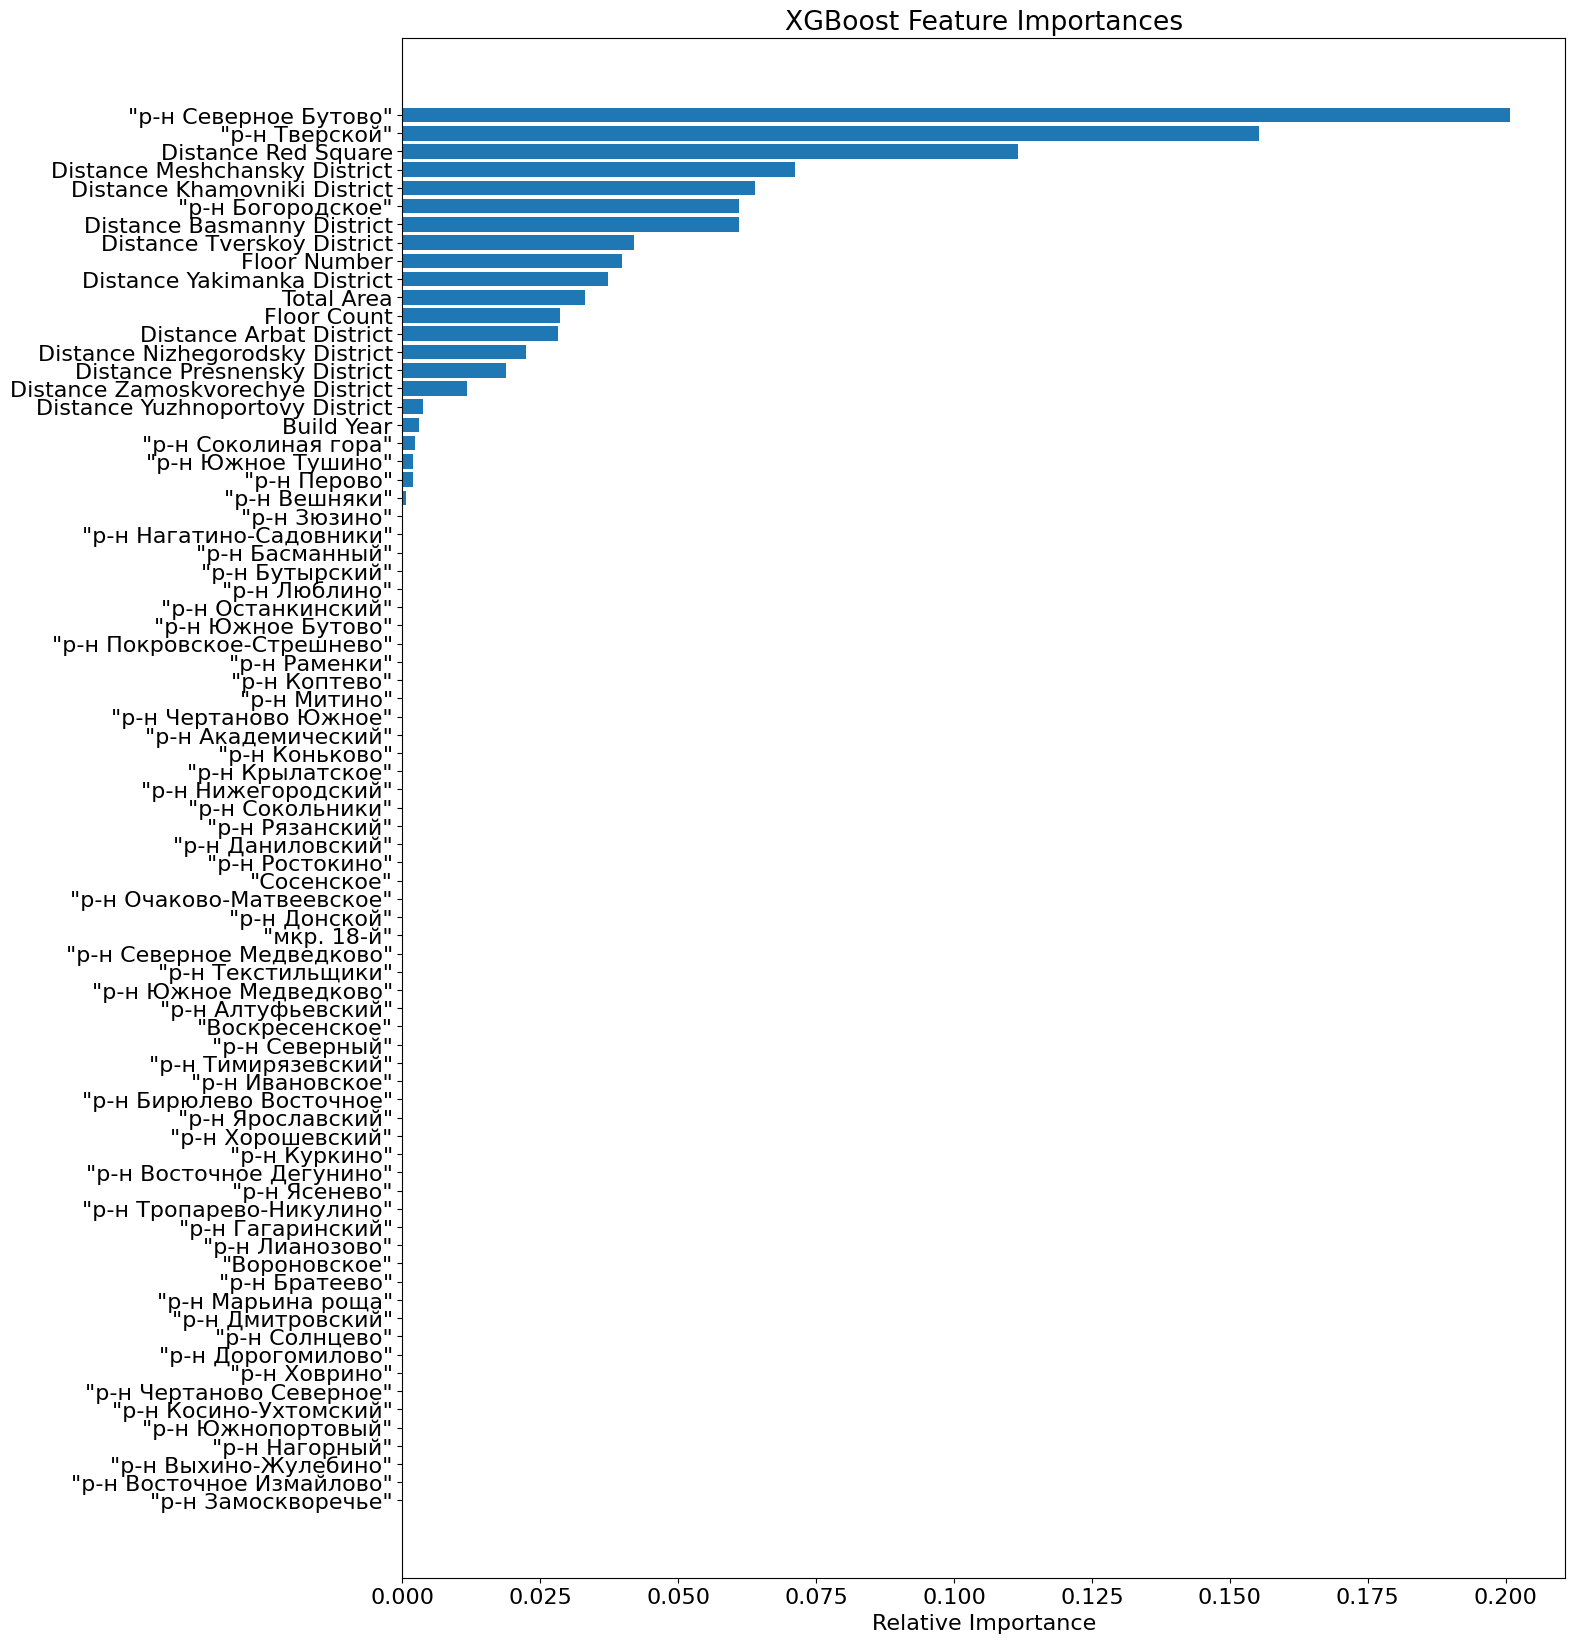

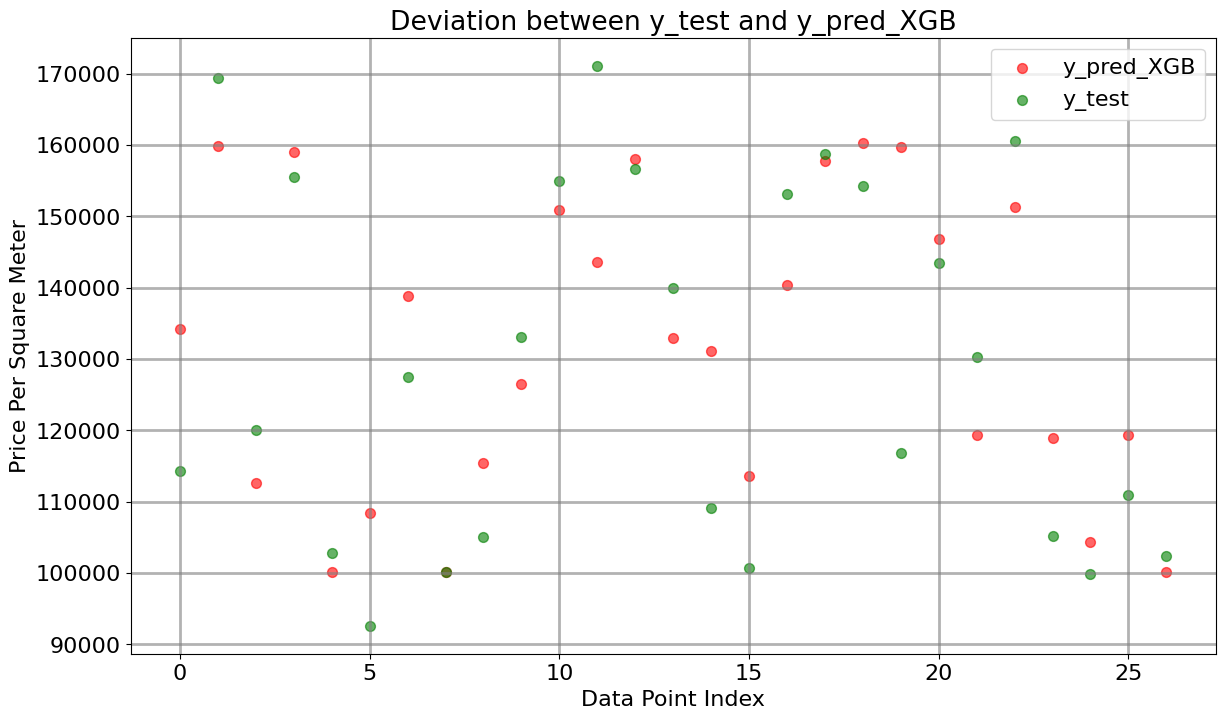

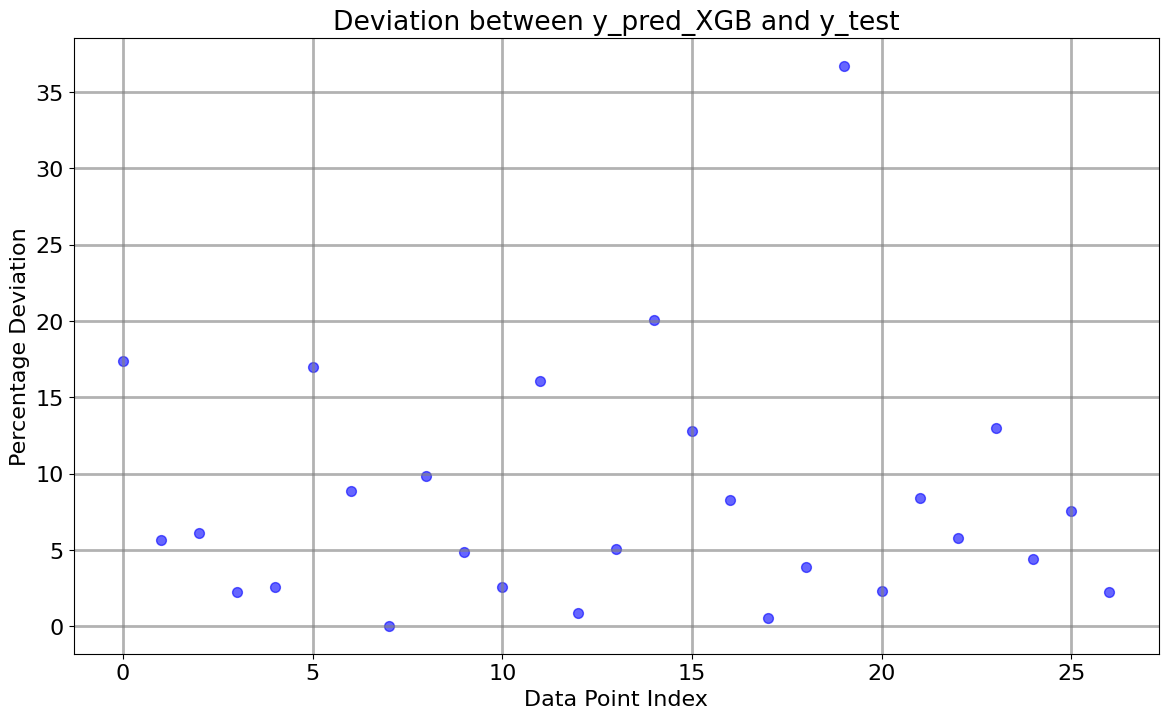

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance

DIFFMDAPE = 1000
trainr2  = 0.01
testr2 = 0

while testr2<trainr2*0.8:
    PredictVariable = 'Price Per Square Meter'
    RowsToDrop = ['Ready Business?', 'Material Type', 'Description','Id Promotion', 'Id User', 'Creation Date', 'Unnamed: 0', 'District', 'Full Price']
    data_train_simple = data.drop(RowsToDrop, axis=1, inplace=False)

    y = data_train_simple[PredictVariable]
    X = data_train_simple.drop([PredictVariable], axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #Моделирование
    #n_estimators от 50 до 150 - 80
    #learning_rate от 0.05 до 0.2
    #max_depth от 5 до 20

    model = XGBRegressor(n_estimators=150, max_depth=12, 
                         reg_alpha=0.1, reg_lambda=0.6, 
                         min_child_weight=10, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_pred_XGB = model.predict(X_test)
    y_train_pred_XGB = model.predict(X_train)
    regress_score(y_train, y_train_pred_XGB, 'No')

    tmp_1 = regress_score(y_test, y_pred_XGB, Print = 'No')
    tmp_2 = regress_score(y_train, y_train_pred_XGB, Print = 'No')
    DIFFMDAPE = tmp_2[1]-tmp_1[1]
    testr2 = tmp_1[1]
    trainr2 = tmp_2[1]

print('Тренировочная выборка')  
regress_score(y_train, y_train_pred_XGB)
print('\nТестовая выборка')  
regress_score(y_test, y_pred_XGB)


# Plot feature importance
feature_names = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-100:]
fig, ax = plt.subplots(figsize=(15, 20))
plt.rcParams.update({'font.size': 16})
ax.barh(range(len(indices)), importances[indices], align='center')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(feature_names[indices])
ax.set_xlabel('Relative Importance')
ax.set_title('XGBoost Feature Importances')
plt.show()

#Для визуализации
x = np.arange(0, len(y_pred_XGB))
fig, ax = plt.subplots(figsize=(14, 8))
# Scatter plots with adjusted marker size and transparency
ax.scatter(x, y_pred_XGB, color='red', label='y_pred_XGB', alpha=0.6, s=50)
ax.scatter(x, y_test, color='green', label='y_test', alpha=0.6, s=50)
# Calculate and plot the trend line
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Price Per Square Meter')
ax.set_title('Deviation between y_test and y_pred_XGB')
ax.legend()
#Сетка
ax.grid(True, linewidth=2, which='both', linestyle='-', axis='both', color='gray',alpha=0.6) # Add gridlines
plt.show()

# Вычислите процент отклонения
deviation_percentage = np.abs((y_pred_XGB - y_test)/y_test )*100
# Создание графика
x = np.arange(0, len(y_pred_XGB))
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(x, deviation_percentage, color='blue', alpha=0.6, s=50)
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Percentage Deviation')
ax.set_title('Deviation between y_pred_XGB and y_test')
ax.grid(True, linewidth=2, which='both', linestyle='-', color='gray', alpha=0.6)
plt.show()

#np.count_nonzero(deviation_percentage>20)

In [27]:
data1_droped = data1.drop(RowsToDrop, axis=1, inplace=False)
ydata1_test = data1_droped[PredictVariable]
Xdata1 = data1_droped.drop([PredictVariable], axis=1, inplace=False)
Xdata1 = scaler.transform(Xdata1)
y_data1_XGB = model.predict(Xdata1)

data11=data1.copy()
data11['y_data1_XGB'] = y_data1_XGB
data11['Difference %'] = (data11['y_data1_XGB']-data11['Price Per Square Meter'])/data11['Price Per Square Meter'] 
data11['Difference %'] = data11['Difference %'].multiply(100)
data11.sort_values('Difference %')
data11['Predicted'] = data11['y_data1_XGB']
data11['Fact'] = data11['Price Per Square Meter']
data11 = data11[data11['Difference %']<1000]


with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(data11[['Id Promotion', 'District', 'Difference %', 'Predicted', 'Fact', 'Total Area', 'Floor Number', 'Floor Count', 'Material Type', 'Build Year']].sort_values('Difference %', ascending=False).head(30))

,Id Promotion,District,Difference %,Predicted,Fact,Total Area,Floor Number,Floor Count,Material Type,Build Year
211,www.cian.ru/sale/commercial/287383352,"""р-н Нижегородский""",863.473702,127003.351562,13181.818182,220.0,2.0,2.0,NaN,NaN
3,www.cian.ru/sale/commercial/285510386,"""р-н Богородское""",515.318650,137042.015625,22271.714922,1347.0,1.0,14.0,NaN,NaN
26,www.cian.ru/sale/commercial/287597321,"""р-н Раменки""",206.103579,183673.421875,60003.683241,543.0,1.0,20.0,NaN,1998.0
47,www.cian.ru/sale/commercial/286798983,"""р-н Тимирязевский""",205.391422,224434.640625,73490.813648,381.0,1.0,8.0,NaN,1936.0
38,www.cian.ru/sale/commercial/282490665,"""р-н Текстильщики""",181.728262,120839.328125,42892.156863,408.0,1.0,5.0,NaN,1955.0
142,www.cian.ru/sale/commercial/283376675,"""р-н Донской""",164.604027,131795.109375,49808.429119,261.0,1.0,4.0,NaN,NaN
89,www.cian.ru/sale/commercial/287091458,"""р-н Рязанский""",151.696224,131400.234375,52205.882353,306.0,1.0,9.0,NaN,1965.0
53,www.cian.ru/sale/commercial/271680778,"""р-н Академический""",150.126604,174000.234375,69564.864865,370.0,4.0,25.0,NaN,2009.0
251,www.cian.ru/sale/commercial/287092059,"""р-н Коптево""",124.491746,135700.234375,60447.761194,201.0,1.0,5.0,NaN,1937.0
74,www.cian.ru/sale/commercial/279226895,"""р-н Зюзино""",117.291702,128956.500000,59347.181009,337.0,16.0,16.0,NaN,NaN


In [25]:
len(data11)

47

In [32]:
current_time_str = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime(time.time()))
data11[['Id Promotion', 'District', 'Difference %', 'Predicted', 'Fact', 'Total Area', 'Floor Number', 'Floor Count', 'Material Type', 'Build Year']].sort_values('Difference %', ascending=False).head(30).to_excel(PATH+"TOP30Df"+current_time_str+".xlsx")

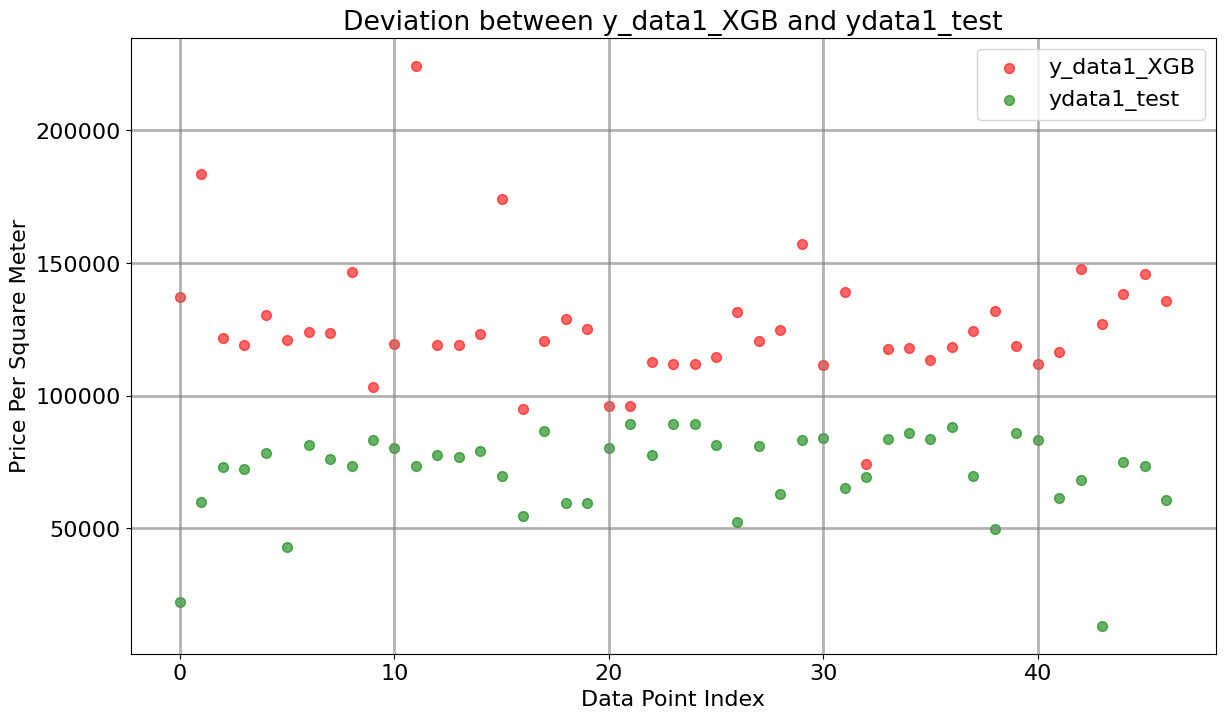

In [11]:
#Для визуализации
x = np.arange(0, len(y_data1_XGB))
fig, ax = plt.subplots(figsize=(14, 8))
# Scatter plots with adjusted marker size and transparency
ax.scatter(x, y_data1_XGB, color='red', label='y_data1_XGB', alpha=0.6, s=50)
ax.scatter(x, ydata1_test, color='green', label='ydata1_test', alpha=0.6, s=50)
# Calculate and plot the trend line
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Price Per Square Meter')
ax.set_title('Deviation between y_data1_XGB and ydata1_test')
ax.legend()
#Сетка
ax.grid(True, linewidth=2, which='both', linestyle='-', axis='both', color='gray',alpha=0.6) # Add gridlines
plt.show()

In [ ]:
#Сохраним модель
import pickle
import time 


PATH=r"C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\MVP CIAN\saved_models\\"


current_time_str = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime(time.time()))
with open(current_time_str+"_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:

#data['Price Per Square Meter'].hist(bins=100)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#    display(data['District'].value_counts())

#print(data['Price Per Square Meter'].min(), data['Price Per Square Meter'].max())
#print(0.8*data['Price Per Square Meter'].mean(), data['Price Per Square Meter'].median())